# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [8]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTEFINAL.csv", delimiter=';')

df.head(2)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [9]:
#A)
df.dtypes


Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [10]:
min(df['Income'])

'100.000,00'

Das variáveis listadas acima, apenas a  Income (object) precisa de um tratamento:

Situação: Deve estar como numérica, mas está como object.

Problema: vírgula como separador decimal.

Tratamento sugerido:
* Remover símbolos monetários e converter para float.



In [11]:
df['Income'] = df['Income'].str.replace('.', '', regex=False)
df['Income'] = df['Income'].str.replace(',', '.', regex=False)

df['Income'] = df['Income'].astype(float)


In [14]:
df.dtypes

Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [12]:
(df.isnull().sum() / len(df)) * 100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

Nota-se que Age tem 20% de dados ausentes, podemos realizar o preenchimento com média ou mediana, vamos analisar sua distribuição para tomar a decisão

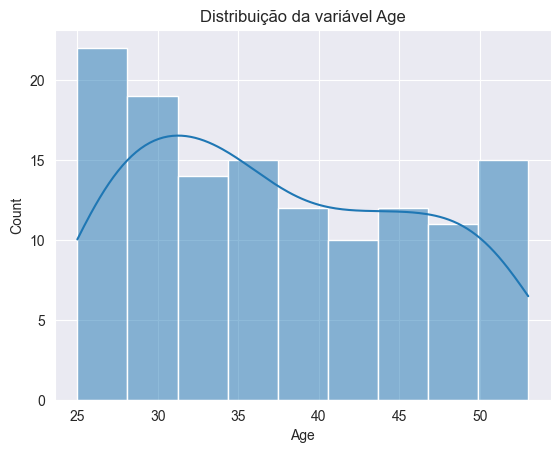

In [13]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribuição da variável Age')
plt.show()

A distribuição não é muita simétrica, logo a média não é uma boa escolha. Assim, podemos usar a mediana que é menos sensível a outliers.

In [15]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())

In [16]:
(df.isnull().sum() / len(df)) * 100

Age                   0.0
Gender                0.0
Income                0.0
Education             0.0
Marital Status        0.0
Number of Children    0.0
Home Ownership        0.0
Credit Score          0.0
dtype: float64

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [22]:
#seu código aqui
# Verificar os valores únicos de cada coluna categórica
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n{col} - Valores únicos:")
    print(df[col].value_counts(dropna=False))



Gender - Valores únicos:
Gender
Female    86
Male      78
Name: count, dtype: int64

Education - Valores únicos:
Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

Marital Status - Valores únicos:
Marital Status
Married    87
Single     77
Name: count, dtype: int64

Home Ownership - Valores únicos:
Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64

Credit Score - Valores únicos:
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

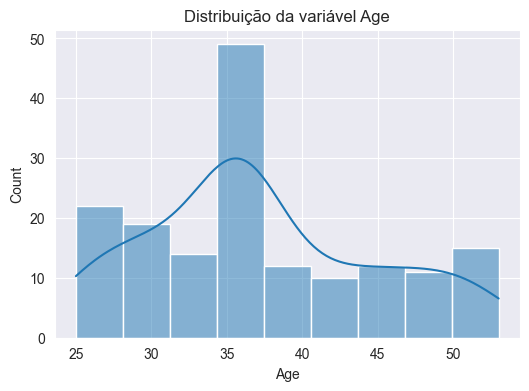

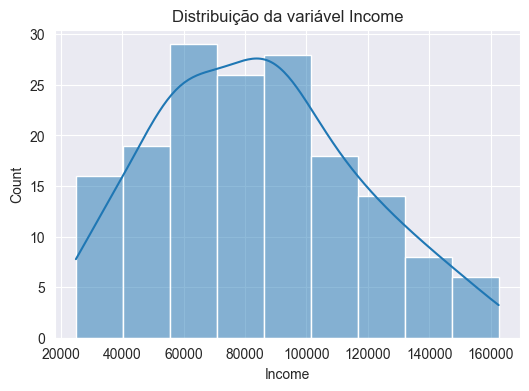

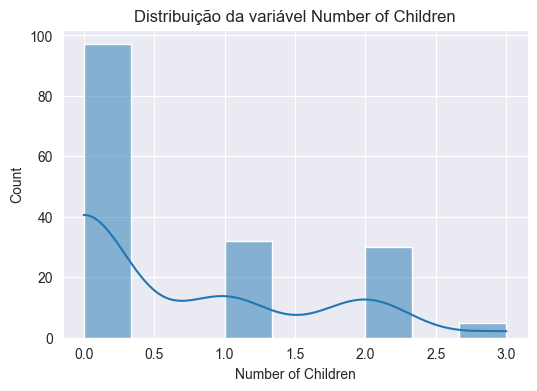

In [23]:
#seu código aqui
# Análise estatística
df.describe()

# Distribuições com histogramas
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição da variável {col}')
    plt.show()

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

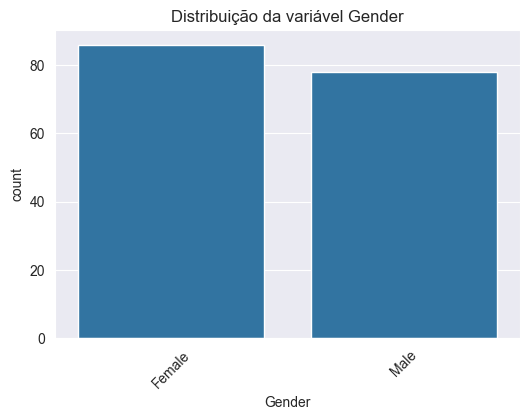

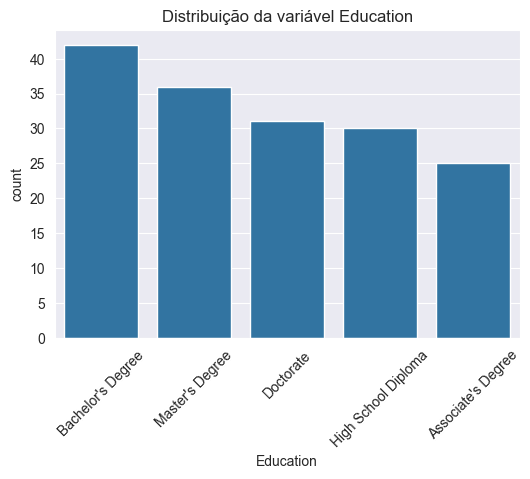

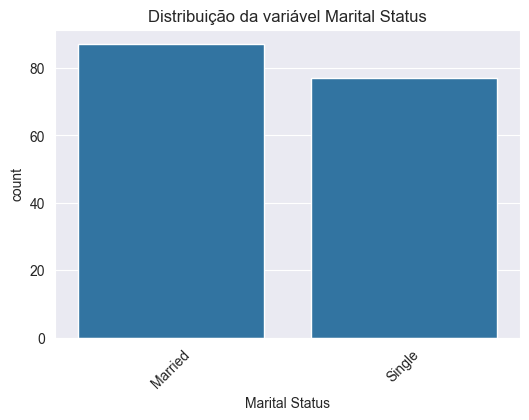

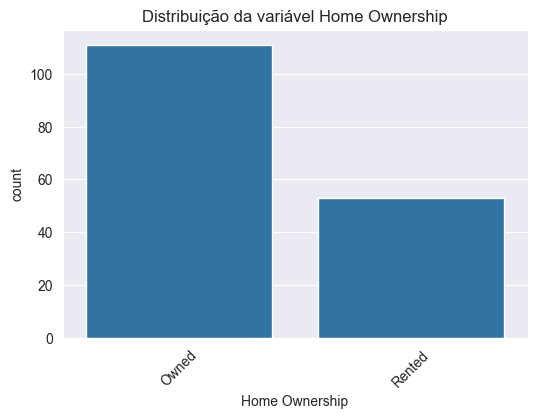

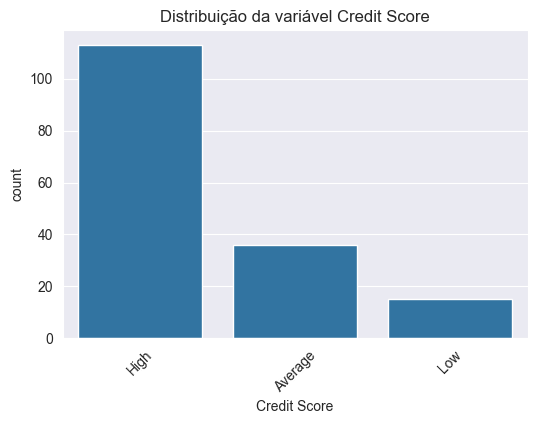

In [24]:
#seu código aqui
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribuição da variável {col}')
    plt.xticks(rotation=45)
    plt.show()

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

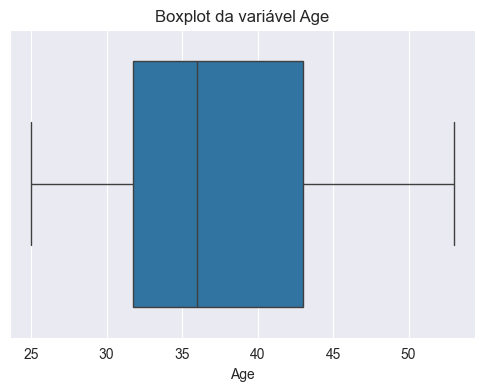

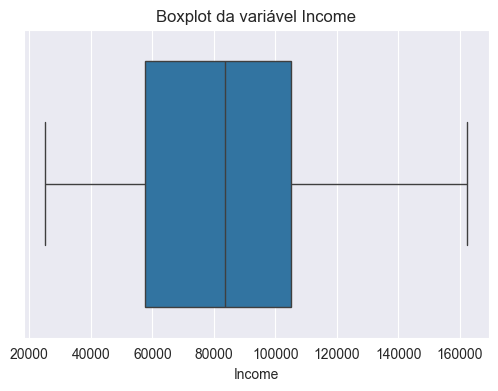

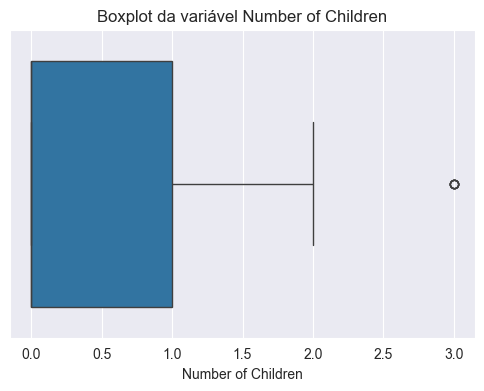

In [26]:
#seu código aqui
# Boxplot para cada numérica
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot da variável {col}')
    plt.show()

    # Exemplo com IQR para a variável 'Income'
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
df = df[(df['Income'] >= limite_inferior) & (df['Income'] <= limite_superior)]

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



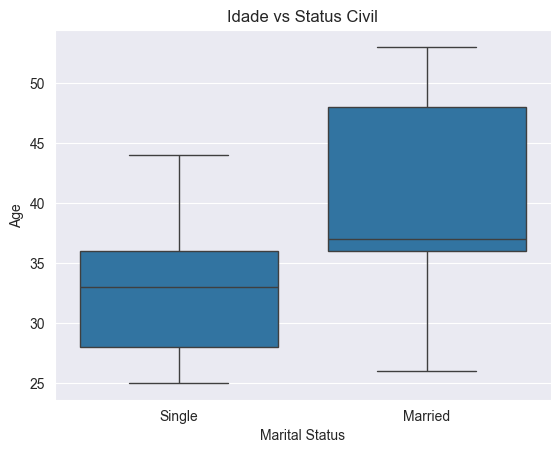

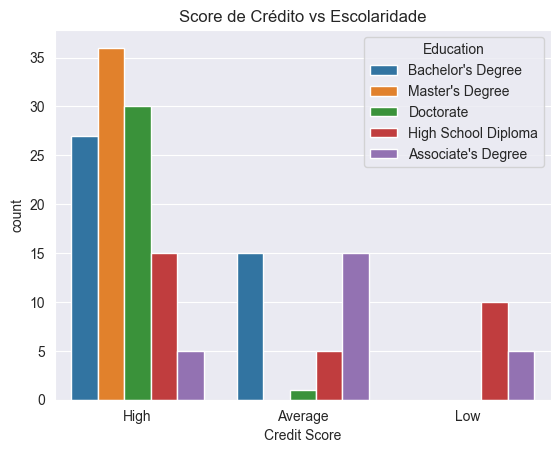

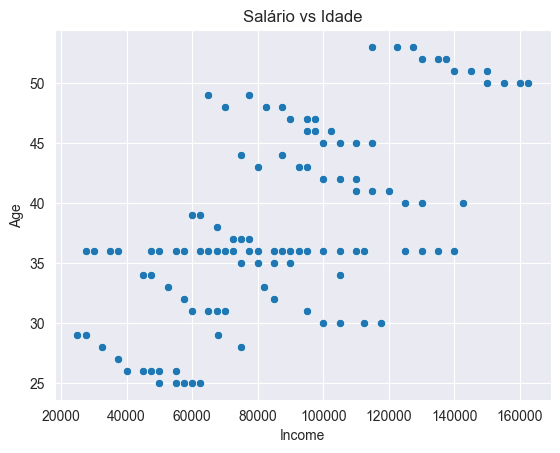

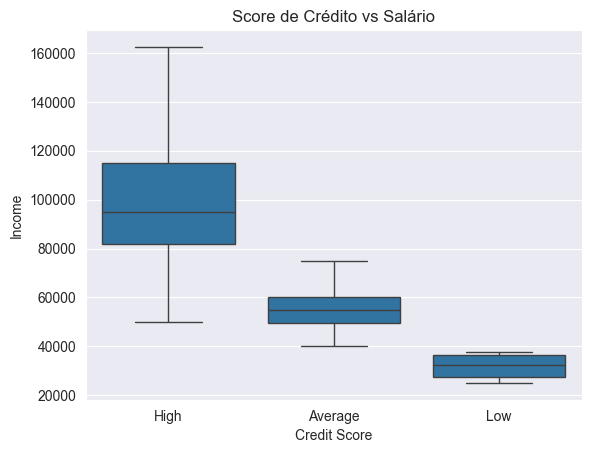

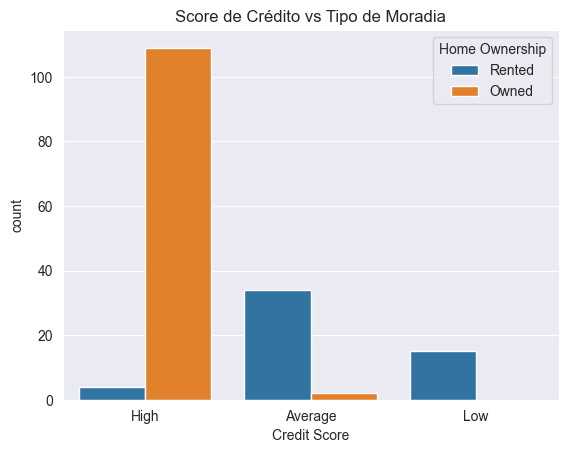

In [27]:
#seu código aqui
# Idade vs Status Civil
sns.boxplot(x='Marital Status', y='Age', data=df)
plt.title('Idade vs Status Civil')
plt.show()

# Score de crédito vs Escolaridade
sns.countplot(x='Credit Score', hue='Education', data=df)
plt.title('Score de Crédito vs Escolaridade')
plt.show()

# Salário vs Idade
sns.scatterplot(x='Income', y='Age', data=df)
plt.title('Salário vs Idade')
plt.show()

# Salário vs Score de crédito
sns.boxplot(x='Credit Score', y='Income', data=df)
plt.title('Score de Crédito vs Salário')
plt.show()

# Score vs Casa Própria
sns.countplot(x='Credit Score', hue='Home Ownership', data=df)
plt.title('Score de Crédito vs Tipo de Moradia')
plt.show()

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

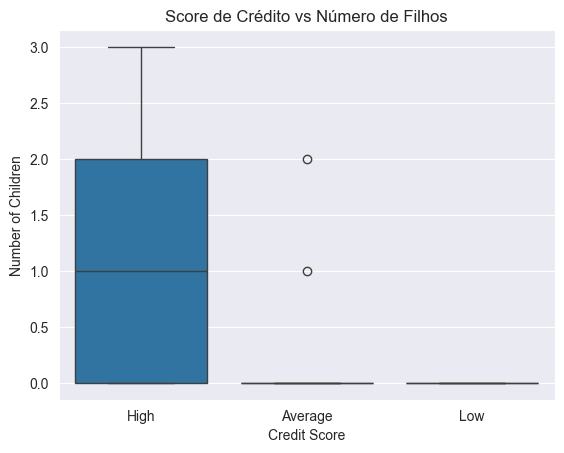

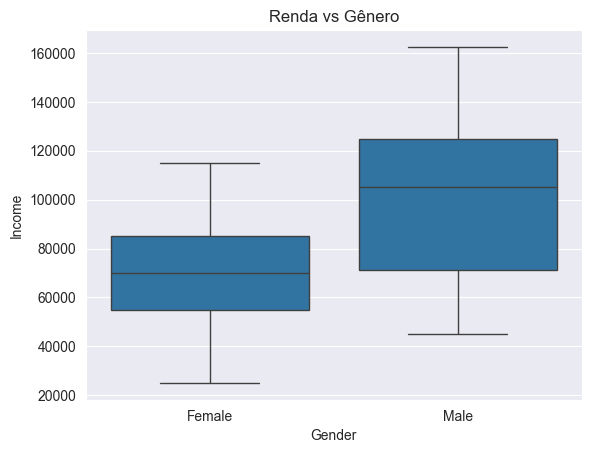

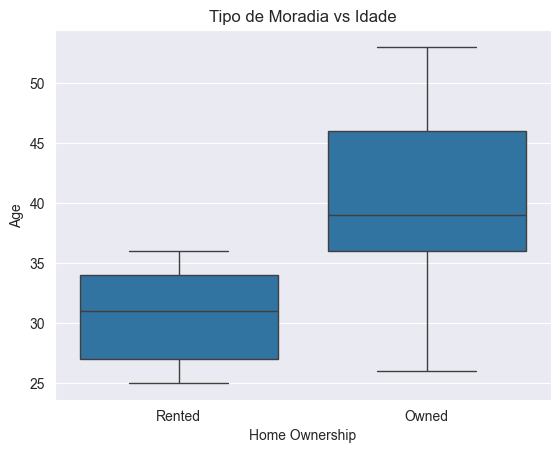

In [29]:
# seu código aqui
sns.boxplot(x='Credit Score', y='Number of Children', data=df)
plt.title('Score de Crédito vs Número de Filhos')
plt.show()

sns.boxplot(x='Gender', y='Income', data=df)
plt.title('Renda vs Gênero')
plt.show()

sns.boxplot(x='Home Ownership', y='Age', data=df)
plt.title('Tipo de Moradia vs Idade')
plt.show()

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

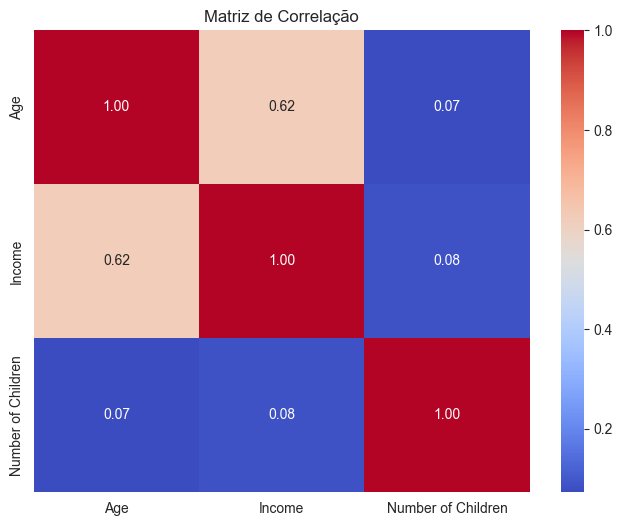

In [30]:
#seu código aqui


plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [ ]:
# sua justificativa aqui
#Income e Age podem ter correlação moderada, o que faz sentido (pessoas mais velhas geralmente ganham mais).

#Numero de crianças pode ter correlação fraca com outras variáveis.



**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

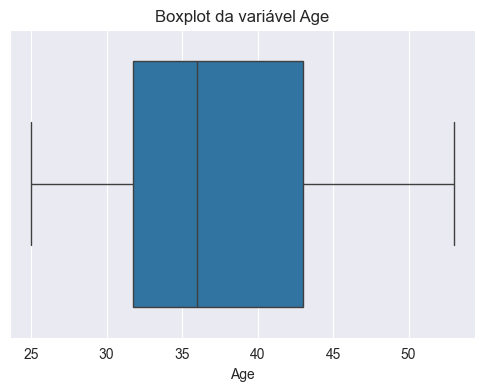

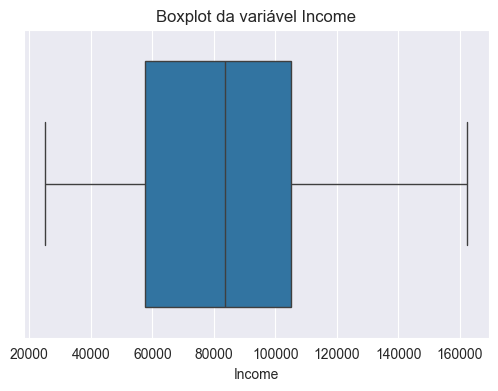

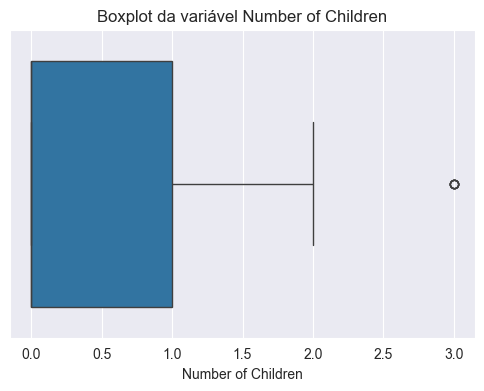

In [35]:
#seu código aqui
# Verificar outliers com boxplot
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot da variável {col}')
    plt.show()


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

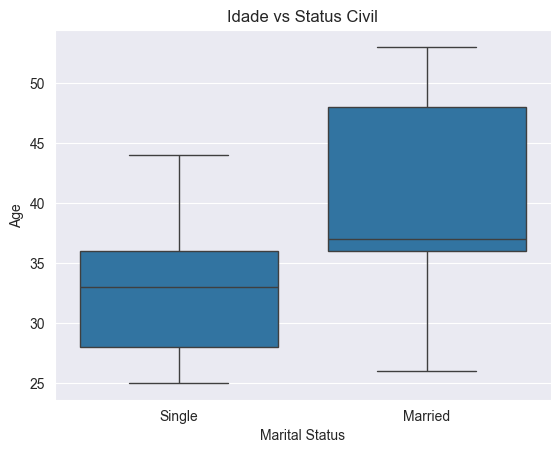

In [36]:
#seu código aqui
sns.boxplot(x='Marital Status', y='Age', data=df)
plt.title('Idade vs Status Civil')
plt.show()

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [31]:
#seu código aqui
from sklearn.model_selection import train_test_split

X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape treino:", X_train.shape)
print("Shape teste:", X_test.shape)

Shape treino: (131, 10)
Shape teste: (33, 10)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

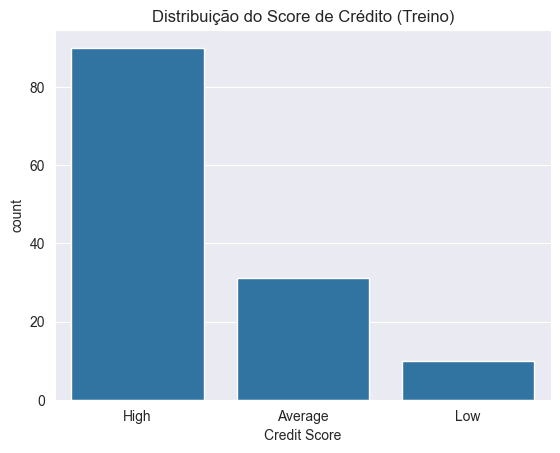

In [32]:
#seu código aqui
sns.countplot(x=y_train)
plt.title("Distribuição do Score de Crédito (Treino)")
plt.show()

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

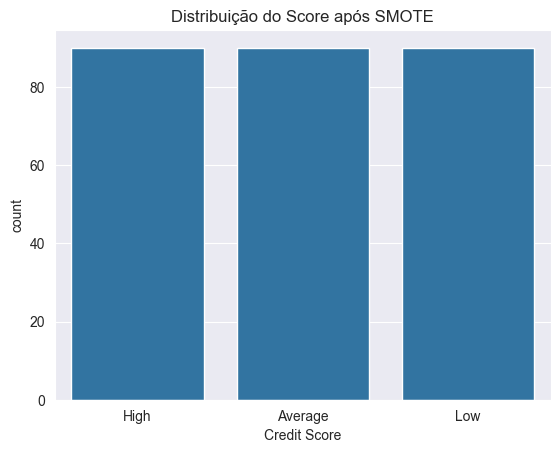

In [34]:
#seu código aqui

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_train_bal)
plt.title("Distribuição do Score após SMOTE")
plt.show()